<a href="https://colab.research.google.com/github/angulorojasmariaclaudia-coder/SOLUCION-DE-PRACTICAS-DE-APRENDIZAJE-AUTOMATICO-I/blob/main/Practica_Datos_de_entrada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica: Datos de entrada
*Máster en Ciencia de Datos y Aprendizaje Automático - Universidad de La Rioja*

Durante el desarrollo de esta práctica, resuelve los ejercicios en este cuaderno justo después de ser propuestos.

Se valorará positivamente la documentación en las respuestas y la explicación de las mismas.

No olvides guardar tus versiones intermedias en GitHub (menú "Archivo" >> "Guardar una copia en GitHub") y la definitiva antes de la fecha límite de entrega.

Bibliografía:

* https://elitedatascience.com/imbalanced-classes
* Imbalanced: https://imbalanced-learn.org/stable/references/
* SMOTE: https://arxiv.org/abs/1106.1813
* Imblearn: https://imbalanced-learn.org/stable/references/generated/imblearn
* ADASYN: [artículo ADASYN](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fsci2s.ugr.es%2Fkeel%2Fpdf%2Falgorithm%2Fcongreso%2F2008-He-ieee.pdf)

##Datos balanceados y no balanceados

#### Conjunto de datos ¿balanceado?

Vamos a usar como entrada el conjunto de datos cuya descripción se encuentra en la siguiente URL "https://www.kaggle.com/code/mysticvalley/balance-scale-analysis-and-prediction".
Son unos datos sintéticos y los vamos a usar para entender que ocurre cuando los datos se encuentran balanceados o no.

Las variables L-Weight (var1), L-Distance (var2), R-Weight (var3) y R-Distance (var4) son numéricas y cada instancia ha sido clasificada de la siguiente manera
*   si var1\*var2=var3\*var4 entonces se clasifica como B,
*   si var1\*var2 > var3\*var4 entonces se clasifica como L
*   si var1\*var2 < var3\*var4 entonces se clasifica como R



Cargamos las librerías que vamos a utilizar:

In [54]:
import pandas as pd
import numpy as np

Para cargar los datos, accedemos al siguiente enlace de GitHub. También se podría hacer accediendo a la página de Kaggle, pero de esta manera evitamos el registro.

Mostramos los 5 primeros valores

In [55]:
# Leer dataset
url = "https://raw.githubusercontent.com/gadeamm/DataSets_AAII/main/balance-scale.csv"
df = pd.read_csv(url, sep=",")

# Mostrar las n primeras filas del dataset
df.head(5)

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


Vemos cuantas instancias hay de cada clase:

In [56]:
df['Class'].value_counts()

,count
Class,
R,288
L,288
B,49


Vemos que hay dos clases con el mismo número de datos (R y L) y otra que no (B).
Para simplificar y hacer aún más exagerado el desbalanceo, vamos a convertir este problema, en un problema de clasificación binaria.

Para ello vamos a re-etiquetar las instancias de la siguiente manera:
- las observaciones que son R y L serán etiquetadas como 0 (clase negativa)
- al resto de observaciones, las que están clasificadas como B, las re-etiquetaremos como 1 (clase positiva).

In [57]:
# Transformación del dataset a un conjunto binario
df['Class'] = [1 if b=='B' else 0 for b in df.Class]

# Mostrar el número de instancias para cada valor de la clase
df['Class'].value_counts()

,count
Class,
0,576
1,49


Como podemos ver, el 92% de la muestra es de la clase 0, esto quiere decir, que si **siempre** tuviéramos que predecir la clase 0, tendríamos un acierto del 92%.

El problema surge que nosotros no vamos a querer clasificar siempre una misma clase.

Veamos como afecta un conjunto de datos balanceado o no a la solución de un problema.

Para ello vamos a usar el algoritmo de Regresión Logística y el algoritmo k-NN (se explicarán con detenimiento más adelante) y la métrica de exactitud (o *accuracy*), todo de la librería Scikit-Learn.

In [58]:
#importamos las librerías correspondientes al algoritmo y la métrica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

A la hora de usar el algoritmo de Regresión Logística (que no nos engañe el nombre, es un algoritmo de clasificación), vamos a usarlo con los parámetros que vienen por defecto, ya que nuestra intención ahora es ver la diferencia entre datos balanceados y sin balancear.

Más adelante trabajaremos sobre como separar los datos para entrenar, testear y validar, en este punto vamos a entrenar y testear con todo el conjunto de datos, ya que no vamos a hacer ajuste de hiperparámetros.

In [61]:
# Separamos las características (X) y la variable objetivo (y)
y = df.Class
X = df.drop('Class', axis=1)

# Entrenamos el modelo
model_lr = LogisticRegression().fit(X, y)
model_knn=KNeighborsClassifier().fit(X,y)

# Predecimos sobre el conjunto de entreanmiento
pred_y_lr = model_lr.predict(X)
pred_y_knn=model_knn.predict(X)

Muchos algoritmos están diseñados para maximizar la exactitud (*accuracy*) por defecto:

In [62]:
#¿Cómo es la accuracy?
print( accuracy_score(pred_y_lr, y) )
print( accuracy_score(pred_y_knn, y) )

0.9216
0.9136


Confirmamos así que el acierto de nuestro modelo es del 92% pero, ¿ocurre esto por qué sólo está prediciendo una clase?

In [63]:
# Mostramos los valores predichos (una vez cada valor)
print( np.unique( pred_y_lr ) )

[0]


De esta manera, comprobamos que este modelo sólo está prediciendo la clase 0, lo que significa que está ignorando la clase minoritaria a favor de la clase mayoritaria.

**EJERCICIO:**

Comprueba si el modelo knn predice sólo una clase o por el contrario predice de las dos.

**RESPUESTA:**

In [64]:
print(np.unique(pred_y_knn))

[0 1]


* De esta manera, comprobamos que este modelo está prediciendo la clase 0 y 1, lo que significa que esta incluyendo a la clase mayoritaria y minoritaria.

Veamos dos técnicas para equilibrar esto:

##**Remuestreo Aleatorio**

####**1. Aumentar la muestra de la clase minoritaria**

El proceso de aumentar la muestra consiste en duplicar aleatoriamente las observaciones de la clase minoritaria para reforzar su señal.

Existen varias heurísticas para hacerlo, pero la forma más común es simplemente volver a muestrear con reemplazo.

Veamos como podemos hacerlo, pero primero cargamos el modulo *resample* de Scikit-Learn que vamos a usar:

In [65]:
from sklearn.utils import resample

El primer paso es crear un nuevo *DataFrame* con el nuevo conjunto de datos para la clase minoritaria. Para ello:
1. Separamos las instancias en grupos, un grupo por cada una de las clases que hay.
2. Re-muestreamos la clase minoritaria usando remplazamineto, y obteniendo el mismo número de muestras que la clase mayoritaria.
3. Finalmente, combinaremos en un nuevo *DataFrame* el nuevo grupo de datos de la clase que era minoritaria y el grupo original de la clase mayoritaria.
Para nuestro ejemplo, el código sería el siguiente:

In [66]:
# Separar las clases mayoritaria y minoritaria
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

# Aumentar la muestra de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # muestra con remplazamiento
                                 n_samples=576,    # número de muestras de la clase mayoritaria
                                 random_state=123) # semilla para que los resultados sean reproducibles (el metodo genere lo mismo)

# Combinar el nuevo grupo con el grupo original mayoritario
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Mostrar el número de instancias en cada clase
df_upsampled.Class.value_counts()

,count
Class,
0,576
1,576


Como podemos ver, el nuevo *DataFrame* tiene más instancias que el original y ahora, el ratio entre las dos clases es de 1:1.

Ahora, usando este conjunto de datos balanceado, vamos a entrenar un modelo de regresión logística.

In [67]:
# Separar las características (X) y la variable objetivo o clase (y)
y = df_upsampled.Class
X = df_upsampled.drop('Class', axis=1)

# Entrenar el modelo
model_lr = LogisticRegression().fit(X, y)

# Predecir en el conjunto de entrenamiento
pred_y_lr = model_lr.predict(X)

In [68]:
# Comprobamos cuáles y cuántas clases predice nuestro modelo
print( np.unique( pred_y_lr ) )

[0 1]


In [69]:
# ¿qué accuracy tenemos ahora?
print( accuracy_score(y, pred_y_lr) )

0.5147569444444444


Observamos que ahora nuestro modelo no predice sólo una clase, sin embargo es cierto que la *accuracy* ha disminuido.Pero tenemos que tener en cuenta que este valor es significativo de lo que está sucediendo, de cuál es el rendimiento del modelo.

**EJERCICIO:**

Entrena un modelo de k-NN (con los hiperparámetros por defecto), y comprueba si clasifica de las dos clases y obtén la *accuracy* de dicho modelo.

**RESPUESTA:**

In [70]:
# Separar las características (X) y la variable objetivo o clase (y)
y = df_upsampled.Class
X = df_upsampled.drop('Class', axis=1)

# Entrenar el modelo
model_knn = KNeighborsClassifier().fit(X,y)

# Predecir en el conjunto de entrenamiento
pred_y_knn = model_knn.predict(X)

# Comprobar clases predichas y accuracy
print("Clase:", np.unique(pred_y_knn))
print("Accuracy:", accuracy_score(y, pred_y_knn))

Clase: [0 1]
Accuracy: 0.9505208333333334


* Tras aplicar el remuestreo aleatorio, el modelo k-NN logra predecir ambas clases [0, 1] y obtiene una accuracy de 0.95, superior a la obtenida con el conjunto desbalanceado.
Esto indica que el balanceo mejoró el rendimiento del modelo al permitirle aprender de forma más equilibrada las dos clases.

####**2. Disminuir la muestra de la clase mayoritaria**

Disminuir el número de instancias de la clase mayoritaria implica la eliminación aleatoria de observaciones para evitar que su señal domine el algoritmo de aprendizaje.

La heurística más común para hacerlo es el remuestreo sin reemplazo.

El proceso es similar al de muestreo visto anteriormente:

1. Separamos las instancias de cada clase en diferentes *DataFrame*.
2. Volvemos a muestrear la clase mayoritaria, esta vez sin remplazo y estableciendo el número de muestras para que coincida con el de la clase minoritaria.
3. Finalmente, combinaremos el nuevo *DataFrame* de la clase mayoritaria con el *DataFrame* original de la clase minoritaria.

In [71]:
# Separar las clases en diferentes DataFrame
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

# Disminuir la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                 replace=False,    # muestra sin remplazamiento
                                 n_samples=49,     # número de muestras de la clase minoritaria
                                 random_state=123) # semilla para que los datos sean reproducibles

# Combinar el nuevo grupo con el grupo original minoritario
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Mostrar el número de instancias en cada clase
df_downsampled.Class.value_counts()

,count
Class,
0,49
1,49


Esta vez, el nuevo *DataFrame* ha disminuido el número de instancias con respecto a su original, y el ratio entre las dos clases, vuelve a ser de 1:1.

Veamos ahora que ocurre si entrenamos con el algoritmo de regresión logística.

In [72]:
# Separar las características (X) y la variable objetivo o clase (y)
y = df_downsampled.Class
X = df_downsampled.drop('Class', axis=1)

# Entrenar el modelo
clf_2 = LogisticRegression().fit(X, y)

# Predecir en el conjunto de entrenamiento
pred_y_2 = clf_2.predict(X)

In [73]:
# Comprobamos cuáles y cuántas clases predice nuestro modelo
print( np.unique( pred_y_2 ) )

[0 1]


In [74]:
# ¿qué accuracy tenemos ahora?
print( accuracy_score(y, pred_y_2) )

0.5612244897959183


Con esta técnica hemos vuelto a evitar que el modelo prediga sólo una clase y además parece que la *accuracy* es más alta.

Veamos ahora otra técnica para balancear nuestras muestras.

**EJERCICIO:**

Entrena un modelo de k-NN (con los hiperparámetros por defecto), y comprueba si clasifica de las dos clases y obtén la *accuracy* de dicho modelo.

**RESPUESTA:**

In [75]:
# Separar las características (X) y la variable objetivo o clase (y)
y = df_downsampled.Class
X = df_downsampled.drop('Class', axis=1)

# Entrenar el modelo
clf_3 = KNeighborsClassifier().fit(X,y)

# Predecir en el conjunto de entrenamiento
pred_y_3 = clf_3.predict(X)

# Comprobar clases predichas y accuracy
print("Clases:", np.unique(pred_y_3))
print("Accuracy:", accuracy_score(y, pred_y_3))

Clases: [0 1]
Accuracy: 0.7959183673469388


* El modelo k-NN logra predecir ambas clases, aunque la accuracy baja a 0.79 debido a la reducción de datos. Aun así, el resultado es positivo, ya que el modelo evita centrarse solo en una clase y mantiene un aprendizaje equilibrado.

####**3. Combinar ambas técnicas: aumentar y disminuir muestras**

**EJERCICIO:**

La clase mayoritaria tiene en nuestro ejemplo 576 instancias y la clase minoritaria 49, vamos a balancear el conjunto de datos aumentando la clase minoritaria y disminuyendo la clase mayoritaria a 312 muestras. Elegimos este número de instancias porque de esta manera hacemos que el número de muestras que se generan y que se eliminan en cada clase es el mismo.

Comprueba que accuracy saldría para los modelos de Regresión Logística y k-NN.
¿Qué modelo da mejor resultado?

**RESPUESTA:**

In [76]:
#Separar las clases mayoritarua y minoritaria
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

#Aumentar la muestra de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=312,
                                 random_state=123)

#Disminuir la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=312,
                                   random_state=123)

#Combinar el nuevo grupo con el grupo original mayoritario
df_combine = pd.concat([df_majority_downsampled, df_minority_upsampled])

#Mostrar el número de instancias en cada clase
df_combine.Class.value_counts()

,count
Class,
0,312
1,312


Como podemos ver, el nuevo DataFrame se encuentra en un punto intermedio de instancias que el original, asimismo el ratio entre las dos clases es de 1:1.

A continuación, usando este conjunto de datos balanceados, se va a entrenar un modelo de regresión logística.

In [77]:
#Separar las variabales
y = df_combine.Class
X = df_combine.drop('Class', axis=1)

#Entrenar el modelo
comb_lr = LogisticRegression().fit(X, y)

#Predecir en el conjunto de entrenamiento
pred_y_lr = comb_lr.predict(X)

# Comprobar clases predichas y accuracy
print("Clase:", np.unique(pred_y_lr))
print("Accuracy:", accuracy_score(y, pred_y_lr))

Clase: [0 1]
Accuracy: 0.5288461538461539


A continuación, usando este conjunto de datos balanceados, se va a entrenar un modelo KNN.

In [78]:
# Entrenar modelo k-NN
comb_knn = KNeighborsClassifier().fit(X, y)

# Predicciones
pred_y_knn = comb_knn.predict(X)

# Comprobar clases predichas y accuracy
print("Clase:", np.unique(pred_y_knn))
print("Accuracy:", accuracy_score(y, pred_y_knn))


Clase: [0 1]
Accuracy: 0.907051282051282


* Al combinar oversampling y undersampling, se obtiene un conjunto balanceado con igual número de muestras por clase.
El modelo k-NN presenta una mejor accuracy (≈0.91) que la regresión logística (≈0.53), lo que indica que esta técnica combinada mejora la capacidad del modelo para reconocer ambas clases sin sesgo hacia la mayoritaria.

**EJERCICO:**

Visto que ocurre aplicando cada técnica por separado y combinándolas ¿qué número de muestra crees que será una mejor elección para nuestro ejemplo?
- aquella que requiera que el número de muestras de oversampling sea mayor (por ejemplo si el conjunto lo tomáramos de 400 instancias para cada clase)
- o aquella que requiera que el número de muestras de oversampling sea menor (por ejemplo, con 100 instancias para cada clase).

Probar si nuestra hipótesis es cierta para este ejemplo. ¿Qué ocurre?

**RESPUESTA:**

In [79]:
# Función para combinar y evaluar con distinto tamaño de muestra
def combinar_y_evaluar(n_muestras):
    # Oversampling (aumentar minoritaria)
    df_minority_up = resample(df_minority, replace=True, n_samples=n_muestras, random_state=123)
    # Undersampling (disminuir mayoritaria)
    df_majority_down = resample(df_majority, replace=False, n_samples=n_muestras, random_state=123)

    # Combinar ambas clases
    df_test = pd.concat([df_majority_down, df_minority_up])

    # Verificar distribución
    print(f"\n- {n_muestras} muestras por clase:")
    print(df_test.Class.value_counts())

    # Variables
    y = df_test.Class
    X = df_test.drop('Class', axis=1)

    # Entrenar modelos
    model_lr = LogisticRegression().fit(X, y)
    model_knn = KNeighborsClassifier().fit(X, y)

    # Predicciones
    pred_lr = model_lr.predict(X)
    pred_knn = model_knn.predict(X)

    # Accuracies
    acc_lr = accuracy_score(y, pred_lr)
    acc_knn = accuracy_score(y, pred_knn)

    print(f"Regresión Logística → Accuracy: {acc_lr:.3f}")
    print(f"k-NN → Accuracy: {acc_knn:.3f}")

# Ejecutar para dos escenarios distintos
combinar_y_evaluar(400)
combinar_y_evaluar(100)


- 400 muestras por clase:
Class
0    400
1    400
Name: count, dtype: int64
Regresión Logística → Accuracy: 0.496
k-NN → Accuracy: 0.927

- 100 muestras por clase:
Class
0    100
1    100
Name: count, dtype: int64
Regresión Logística → Accuracy: 0.550
k-NN → Accuracy: 0.765


* El modelo k-NN obtiene mejor rendimiento con 400 muestras por clase (accuracy ≈ 0.93) frente a 100 por clase (accuracy ≈ 0.76), mientras que la regresión logística se mantiene baja en ambos casos. Esto muestra que usar un mayor número de muestras balanceadas mejora el aprendizaje y la capacidad predictiva del modelo.

**EJERCICIO EXTRA:**

Existe otra librería que incluye estos métodos de balanceo de datos y los métodos se definen como *RandomOverSampler* y *RandomUnderSampler*. Lee como se usa y prueba a usarlos como hemos hecho con los métodos de la librería Scikit-Learn (oversampling, undersampling, y combinado). Obtén la *accuracy* para al menos uno de los modelos (LR y/o k-NN).


**RESPUESTA:**

In [80]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [81]:
#Variables
y = df.Class
X = df.drop('Class', axis=1)

#Oversampling
ros = RandomOverSampler(random_state=123)
X_ros, y_ros = ros.fit_resample(X, y)

#Undersampling
rus = RandomUnderSampler(random_state=123)
X_rus, y_rus = rus.fit_resample(X, y)

#Modelo de Regresión Logística
model = LogisticRegression()

#Entrenar y evaluar con Oversampling
model.fit(X_ros, y_ros)
pred_ros = model.predict(X_ros)
print("Oversampling → Accuracy:", accuracy_score(y_ros, pred_ros))

#Entrenar y evaluar con Undersampling
model.fit(X_rus, y_rus)
pred_rus = model.predict(X_rus)
print("Undersampling → Accuracy:", accuracy_score(y_rus, pred_rus))

Oversampling → Accuracy: 0.5130208333333334
Undersampling → Accuracy: 0.5612244897959183


* El modelo de regresión logística muestra rendimientos similares con RandomOverSampler y RandomUnderSampler, con accuracies cercanas al 50-56 %. Esto indica que, aunque el balanceo mejora la distribución de clases, la regresión logística no logra aprovecharlo del todo, por lo que modelos no lineales como k-NN o árboles podrían ofrecer mejores resultados.

### **SMOTE: Synthetic Minority Oversampling TEchnique**

Como hemos visto, una manera de solucionar el problema de que una clase tenga menos muestras que otra, es duplicar las instancias de la clase minoritaria en el conjunto de entrenamiento. Así obtenemos un conjunto balanceado pero esta solución no proporciona información adicional al modelo.

En lugar de duplicar las instancias de la clase minoritaria podemos *sintetizar* (crear de manera artificial) nuevas instancias que pertenezcan a esta muestra.

Quizás una de las técnicas más usadas es la que se denomina **Synthetic Minority Oversampling TEchnique** (SMOTE). Esta técnica fue descrita por Nitesh Chawla et al. en 2002 en el artículo "[SMOTE: Synthetic Minority Oversampñling Technique](https://arxiv.org/abs/1106.1813)".

SMOTE funciona seleccionando ejemplos cercanos en el espacio de características, dibujando una línea entre los ejemplos en el espacio de características y dibujando una nueva muestra en un punto a lo largo de esa línea.

Específicamente, primero se elige un ejemplo aleatorio de la clase minoritaria. Entonces se encuentran k de los vecinos más cercanos para ese ejemplo (típicamente k = 5). Se elige un vecino seleccionado al azar y se crea un ejemplo sintético en un punto seleccionado al azar entre los dos ejemplos en el espacio de características.
Este procedimiento se puede utilizar para crear tantos ejemplos sintéticos para la clase minoritaria como sean necesarios. Como se describe en el documento, sugiere usar primero un submuestreo aleatorio para recortar el número de ejemplos en la clase mayoritaria, luego usar SMOTE para sobremuestrear la clase minoritaria para equilibrar la distribución de clases.

A continuación vemos un ejemplo de uso , y para ello vamos a necesitar la librería *imbalanced-learn*

In [82]:
# Comprobamos que está instalada y cuál es su versión
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.14.0


Importamos el resto de librerías que se van a usar

In [83]:
# Resto de librerías que vamos a usar
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

Definimos un conjunto de datos aleatorio con dos clases. Para ello usamos la instrucción *make_classification* del módulo datasets de la librería Scikit-Learn.

Lo que hace este método es crear conjuntos de datos multiclase, asignando a cada clase una o más instancias distribuidas normalmente. Este método está especializado en introducir ruido por medio de las muestras, es decir, genera caracterísitcas correlacionas, redundantes y no informativas.


In [84]:
# Creamos el conjunto de datos aleatorio
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# Mostramos como está distribuida la variable objetivo
counter = Counter(y)
print(counter)

Counter({np.int64(0): 9900, np.int64(1): 100})


Dibujamos como sería nuestro dataset

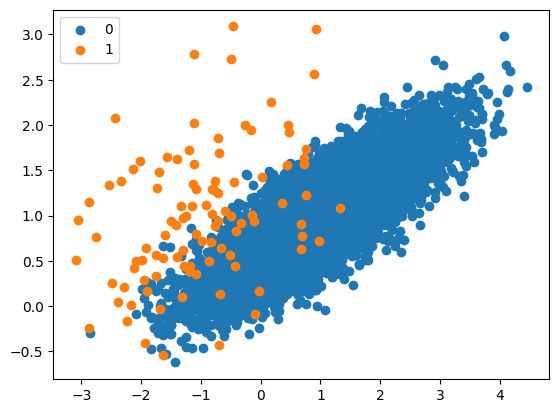

In [ ]:
# Dibujamos en un gráfico el dataset creado
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Aplicamos la técnica SMOTE:

In [85]:
# Transformamos el conjunto de datos
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# Obtenemos la nueva distribución de clases en la variable y
counter = Counter(y)
print(counter)

Counter({np.int64(0): 9900, np.int64(1): 9900})


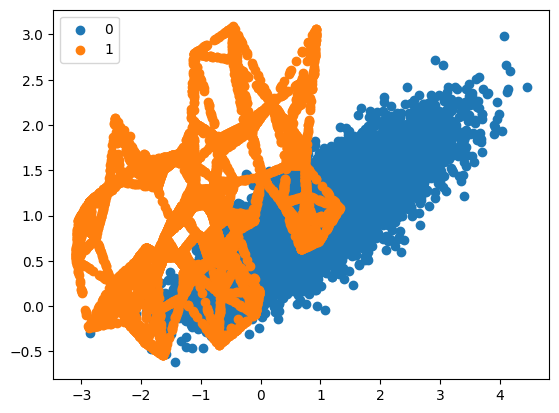

In [ ]:
# # Dibujamos en un gráfico el dataset transformado
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

El artículo original sobre SMOTE sugiere combinar SMOTE con un submuestreo aleatorio de la clase mayoritaria. La biblioteca de aprendizaje desequilibrado admite submuestreo aleatorio a través de la clase RandomUnderSampler.

Podemos actualizar el ejemplo para sobremuestrear primero la clase minoritaria para tener un 10 por ciento del número de ejemplos de la clase mayoritaria (por ejemplo, alrededor de 1000), luego usar un submuestreo aleatorio para reducir el número de ejemplos en la clase mayoritaria para tener un 50 por ciento más que el clase minoritaria (por ejemplo, alrededor de 2000).

Para implementar esto, podemos especificar las proporciones deseadas como argumentos para las clases SMOTE y RandomUnderSampler;

Volvemos a definir el conjunto de datos original.

In [86]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({np.int64(0): 9900, np.int64(1): 100})


A continuación, se transforma el conjunto de datos, primero sobremuestreando la clase minoritaria y luego submuestreando la clase mayoritaria.

La distribución de clases final después de esta secuencia de transformaciones coincide con una proporción de 1: 2 o aproximadamente 2000 ejemplos en la clase mayoritaria y aproximadamente 1000 ejemplos en la clase minoritaria.

In [87]:
# check version number
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({np.int64(0): 1980, np.int64(1): 990})


Nota: aquí puedes encontrar más información de cómo usar [*pipeline*.](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html)

Mostramos el resultado mediante un *ScatterPlot* o gráfico de puntos.

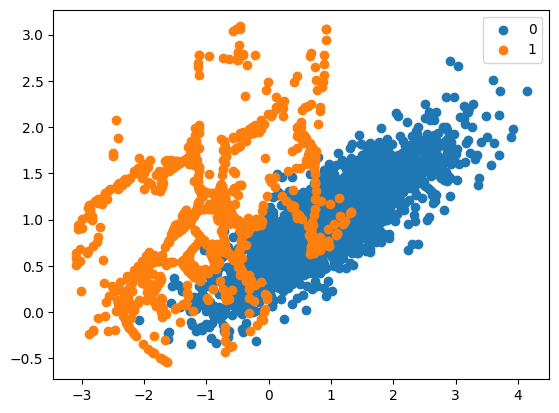

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

###ADASYN: Adaptative Synthetic Sampling Approach For Imbalanced Learning

Otro enfoque implica la generación de muestras sintéticas inversamente proporcional a la densidad de los ejemplos de la clase minoritaria.

Es decir, generar más ejemplos sintéticos en regiones del espacio de características donde la densidad de ejemplos minoritarios es menor que la densidad de la clase mayoritaria.

Esta modificación de SMOTE se conoce como Método de muestreo sintético adaptativo, o ADASYN, y lo propuso a Haibo He, et al. en su artículo de 2008 llamado así por el método titulado “[ADASYN: Adaptive Synthetic Sampling Approach For Imbalanced Learning.](https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf)”.

La idea clave del algoritmo ADASYN es utilizar una distribución de densidad como criterio para decidir automáticamente el número de muestras sintéticas que deben generarse para cada ejemplo de datos minoritarios.

Podemos aplicar este procedimiento utilizando la clase ADASYN en la librería *imbalanced-learn*.

Cargamos las librerías que vamos a necesitar:

In [88]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where

Volvemos a crear un conjunto de datos de dos clases con dos características para usarlo como ejemplo.

In [89]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({np.int64(0): 9900, np.int64(1): 100})


Usamos el método ADASYN que está en la librería imbalanced-learn.

In [ ]:
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({np.int64(0): 9900, np.int64(1): 9899})


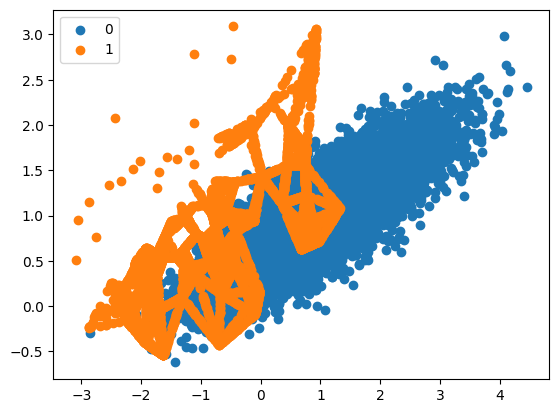

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

**EJERCICIO:**

Tanto el método SMOTE y ADASYN se basan, para sintetizar nuevas muestras, en el estudio de los k vecinos de cada una de las instancias. Por defecto se ha comentado que ambos métodos usan k=5. Prueba a ver que ocurre para ambos métodos, con k=3 y con k=7, ¿cambia mucho el conjunto final según el número de vecinos que usemos?

**RESPUESTA:**

Probando ***SMOTE***  con *k* = 3 y *k* = 7:


SMOTE con k=3 -> Counter({np.int64(0): 9900, np.int64(1): 9900})


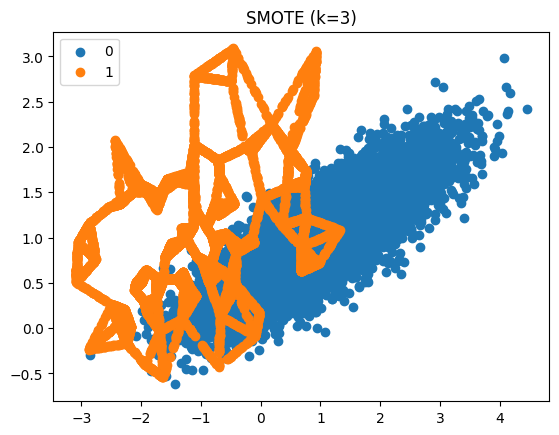


SMOTE con k=7 -> Counter({np.int64(0): 9900, np.int64(1): 9900})


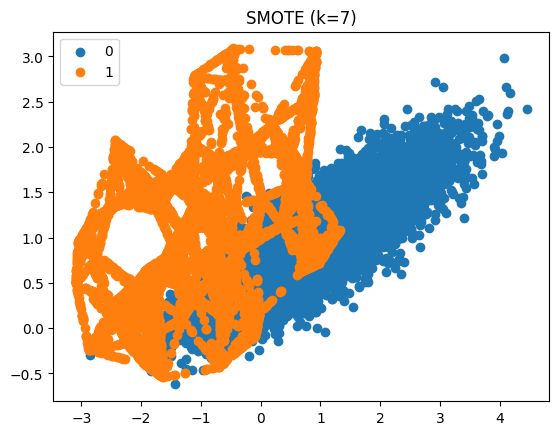

In [ ]:
for k in [3, 7]:
    smote = SMOTE(k_neighbors=k, random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    print(f"\nSMOTE con k={k} -> {Counter(y_res)}")

    # Gráfico dentro del bucle
    for label, _ in Counter(y_res).items():
        row_ix = where(y_res == label)[0]
        pyplot.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
    pyplot.title(f"SMOTE (k={k})")
    pyplot.legend()
    pyplot.show()

Probando ***ADASYN*** con *k* = 3 y *k* = 7:


ADASYN con k=3 -> Counter({np.int64(0): 9900, np.int64(1): 9892})


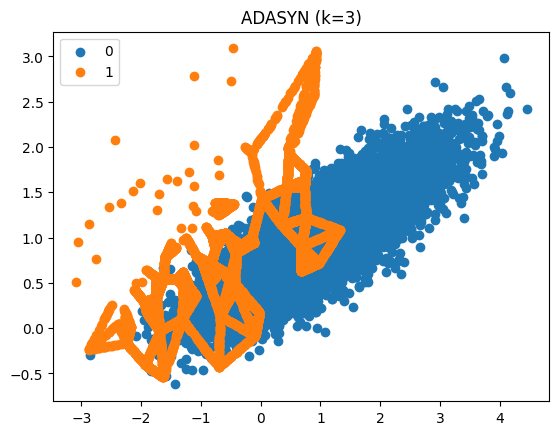


ADASYN con k=7 -> Counter({np.int64(0): 9900, np.int64(1): 9899})


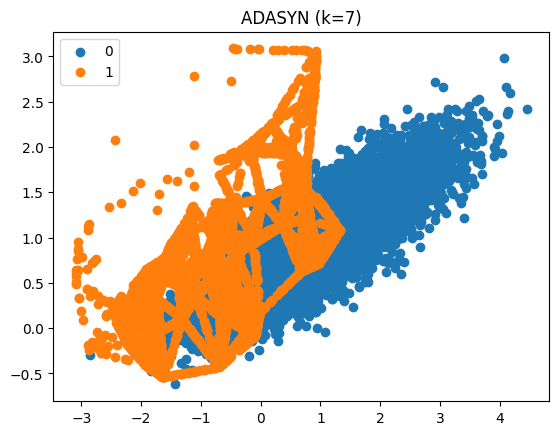

In [ ]:
for k in [3, 7]:
    adasyn = ADASYN(n_neighbors=k, random_state=42)
    X_res, y_res = adasyn.fit_resample(X, y)
    print(f"\nADASYN con k={k} -> {Counter(y_res)}")

    # Gráfico
    for label, _ in Counter(y_res).items():
        row_ix = where(y_res == label)[0]
        pyplot.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
    pyplot.title(f"ADASYN (k={k})")
    pyplot.legend()
    pyplot.show()

* El número de vecinos (k) no cambia el total de instancias creadas con SMOTE, que siempre produce un dataset perfectamente balanceado. En cambio, ADASYN ajusta el número de ejemplos sintéticos según la densidad local de la clase minoritaria, por lo que el balance final puede variar ligeramente. A medida que aumenta k, ADASYN tiende a generar más ejemplos y distribuirlos de forma más uniforme en el espacio.

**EJERCICIO:**

Aplica las técnicas de Aumentar la muestra (Oversampling), Disminuir la muestra (Undersampling), SMOTE y ADASYN sobre el conjunto de datos que se encuentra en [https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv ](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)

Este conjunto de datos es original del *National Institute of Diabetes and Digestive and Kidney Diseases* y se usa para predecir si un paciente tiene diabetes o no, basándose en las medidas de diagnóstico que se recogen en los datos.

El nombre de las columnas del conjunto de datos son ['NO_PREG','PLASMA_GLUCOSE','DIASTOLIC_BP','SKIN_THICKNESS','SERUM_INSULIN','BMI','DIA_PEDI_FUNC','AGE','TARGET'] siendo la última, la característica objetivo.

**RESPUESTA:**

In [90]:
# Leer dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ['NO_PREG','PLASMA_GLUCOSE','DIASTOLIC_BP','SKIN_THICKNESS',
            'SERUM_INSULIN','BMI','DIA_PEDI_FUNC','AGE','TARGET']
df = pd.read_csv(url, names=columnas)
# Mostrar las n primeras filas del dataset
df.head()

,NO_PREG,PLASMA_GLUCOSE,DIASTOLIC_BP,SKIN_THICKNESS,SERUM_INSULIN,BMI,DIA_PEDI_FUNC,AGE,TARGET
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
#Verificamos el equilibrio de la clase
print("Distribución original de clases:", Counter(df['TARGET']))

Distribución original de clases: Counter({0: 500, 1: 268})


In [92]:
# Separamos en clases mayoritaria y minoritaria
df_majority = df[df.TARGET == 0]
df_minority = df[df.TARGET == 1]

Combinación de Oversampling + Undersampling:

In [93]:
#Aumentamos la clase minoritaria (Oversampling)
df_minority_upsampled = resample(
    df_minority,
    replace=True,       # permite repetir muestras
    n_samples=400,      # número de instancias deseadas
    random_state=42
)

In [94]:
#Disminuimos la clase mayoritaria (Undersampling)
df_majority_downsampled = resample(
    df_majority,
    replace=False,      # sin reemplazo
    n_samples=400,      # igual número que la minoritaria
    random_state=42
)

In [95]:
#Combinamos ambas clases
df_combined = pd.concat([df_majority_downsampled, df_minority_upsampled])
print("Distribución combinada:", Counter(df_combined['TARGET']))

Distribución combinada: Counter({0: 400, 1: 400})


Entrenar y evaluar modelos:

In [96]:
# Variables predictoras y objetivo
X = df_combined.drop('TARGET', axis=1)
y = df_combined['TARGET']

# Modelos
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

# Entrenar
lr.fit(X, y)
knn.fit(X, y)

# Predicciones
pred_lr = lr.predict(X)
pred_knn = knn.predict(X)

print(f"Accuracy LR: {np.round(accuracy_score(y, pred_lr),3)}")
print(f"Accuracy k-NN: {np.round(accuracy_score(y, pred_knn),3)}")

Accuracy LR: 0.735
Accuracy k-NN: 0.809




*   Al combinar las técnicas de oversampling y undersampling, se logra un conjunto de datos más equilibrado (400 muestras por clase). En los resultados, el modelo k-NN presenta una accuracy superior (≈ 0.81) frente a la Regresión Logística (≈ 0.73), lo que indica que k-NN se adapta mejor a los patrones generados tras el re-muestreo.



Aplicamos SMOTE y ADASYN:

In [104]:
# Variables predictoras y objetivo
X = df.drop('TARGET', axis=1)
y = df['TARGET']

print("Distribución original:", Counter(y))

Distribución original: Counter({0: 500, 1: 268})



Distribución tras SMOTE: Counter({1: 500, 0: 500})


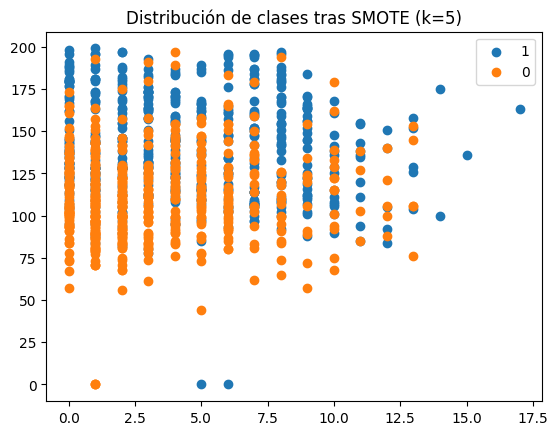

In [105]:
# Aplicar SMOTE con k=5
smote = SMOTE(k_neighbors=5, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_res_smote = X_res
y_res_smote = y_res

print("\nDistribución tras SMOTE:", Counter(y_res))

# Gráfico
for label, _ in Counter(y_res).items():
    row_ix = where(y_res == label)[0]
    pyplot.scatter(X_res.iloc[row_ix, 0], X_res.iloc[row_ix, 1], label=str(label))
pyplot.title("Distribución de clases tras SMOTE (k=5)")
pyplot.legend()
pyplot.show()


Distribución tras ADASYN: Counter({0: 500, 1: 474})


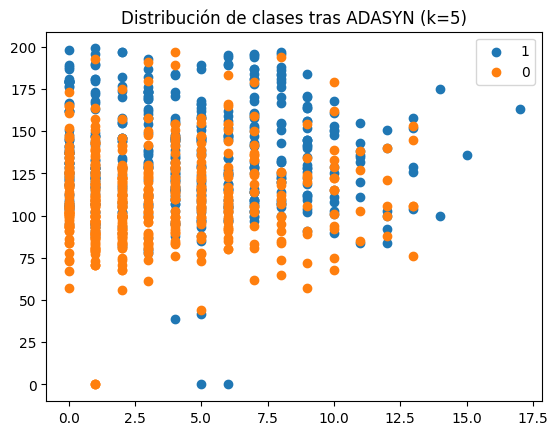

In [106]:
# Aplicar ADASYN con k=5
adasyn = ADASYN(n_neighbors=5, random_state=42)
X_res, y_res = adasyn.fit_resample(X, y)

X_res_adasyn = X_res
y_res_adasyn = y_res

print("\nDistribución tras ADASYN:", Counter(y_res))

# Gráfico
for label, _ in Counter(y_res).items():
    row_ix = where(y_res == label)[0]
    pyplot.scatter(X_res.iloc[row_ix, 0], X_res.iloc[row_ix, 1], label=str(label))
pyplot.title("Distribución de clases tras ADASYN (k=5)")
pyplot.legend()
pyplot.show()



*   En conjunto, ambos métodos mejoran la representatividad de las clases minoritarias; SMOTE resulta más estable y equilibrado, mientras que ADASYN genera una variabilidad más realista para el entrenamiento de modelos.



**EJERCICIO EXTRA:**

Una vez tengas los conjuntos balanceados para los cuatro tipos de métodos, calcula la *accuracy* que sale al aplicar el método de Regresión Logística sobre cada conjunto, teniendo en cuenta que el valor de la *accuracy* ha de estar entre 0 y 1 siendo 1 el mejor resultado: ¿Hay alguno que sea claramente mejor?

**RESPUESTA:**

In [108]:
#Dataset Original
X_orig = df.drop('TARGET', axis=1)
y_orig = df['TARGET']

lr_orig = LogisticRegression(max_iter=2000, random_state=42)
lr_orig.fit(X_orig, y_orig)
pred_orig = lr_orig.predict(X_orig)
acc_orig = accuracy_score(y_orig, pred_orig)

In [109]:
#Combinación Oversampling + Undersampling
X_comb = df_combined.drop("TARGET", axis=1)
y_comb = df_combined["TARGET"]

lr_comb = LogisticRegression(max_iter=2000, random_state=42)
lr_comb.fit(X_comb, y_comb)
pred_comb = lr_comb.predict(X_comb)
acc_comb = accuracy_score(y_comb, pred_comb)

In [110]:
#SMOTE
lr_smote = LogisticRegression(max_iter=2000, random_state=42)
lr_smote.fit(X_res_smote, y_res_smote)
pred_smote = lr_smote.predict(X_res_smote)
acc_smote = accuracy_score(y_res_smote, pred_smote)

In [111]:
#ADASYN
lr_adasyn = LogisticRegression(max_iter=2000, random_state=42)
lr_adasyn.fit(X_res_adasyn, y_res_adasyn)
pred_adasyn = lr_adasyn.predict(X_res_adasyn)
acc_adasyn = accuracy_score(y_res_adasyn, pred_adasyn)

In [113]:
#COMPARANDO RESULTADOS
print(f"Accuracy Original:            {acc_orig:.3f}")
print(f"Accuracy Over + Under:        {acc_comb:.3f}")
print(f"Accuracy SMOTE:               {acc_smote:.3f}")
print(f"Accuracy ADASYN:              {acc_adasyn:.3f}")

Accuracy Original:            0.781
Accuracy Over + Under:        0.735
Accuracy SMOTE:               0.751
Accuracy ADASYN:              0.726


**Interpretación:**

Entre las técnicas de balanceo evaluadas, **SMOTE** es el método que ofrece claramente el mejor rendimiento con Regresión Logística. El *oversampling + undersampling* reduce el desempeño al eliminar información útil, mientras que ADASYN introduce ruido adicional en zonas difíciles.
Aunque el conjunto original muestra mayor accuracy, esto se debe al desbalance de clases; por tanto, el mejor método balanceado es **SMOTE**.

**EJERCICIO EXTRA:**

En clase de teoría se ha explicado que una estrategia para balancear una clase y de esta manera poder eliminar ruido del dataset (posibles datos anómalos) es usar el método *One-Class Classification* (Clasificación de una clase).

Crea una conjunto de datos aleatorio con 10000 muestras, dónde de la clase minoritaria sólo haya 10, siendo la distribución de la muestra 1:1000.

La librería *scikit-learn* tiene implementado varios algoritmos de clasificación para una clase, en particular:


*   One-class SVM
*   Isolation Forest

Busca como usar l menos uno de estos dos métodos y ponlo en práctica en el conjunto de datos generado.



**RESPUESTA:**

In [118]:
#Crear dataset muy desbalanceado 1:1000
X, y = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.999],
    flip_y=0,
    random_state=42
)

In [119]:
from collections import Counter
print("Distribución de clases:", Counter(y))

Distribución de clases: Counter({np.int64(0): 9990, np.int64(1): 10})




> Aplicando Isolation Forest



In [120]:
from sklearn.ensemble import IsolationForest

#Filtrar la clase mayoritaria
X_majority = X[y == 0]

#Entrenamos Isolation Forest SOLO con la clase mayoritaria
iso = IsolationForest(contamination=0.001, random_state=42)
iso.fit(X_majority)

IsolationForest(contamination=0.001, random_state=42)



> Predecir anomalias



In [121]:
#Prediccion
y_pred = iso.predict(X)

#Convertir
y_pred = np.where(y_pred == -1, 1, 0)

print("Predicción de clases:", Counter(y_pred))

Predicción de clases: Counter({np.int64(0): 9990, np.int64(1): 10})




> ¿Qué tal detecta la clase minoritaria?



In [123]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      9990
           1      0.000     0.000     0.000        10

    accuracy                          0.998     10000
   macro avg      0.499     0.499     0.499     10000
weighted avg      0.998     0.998     0.998     10000



**Interpretación:**

El método One-Class Isolation Forest, no es efectivo para detectar clase minoritarias cuando la relación es extremadamente desbalanceada.

En todo caso, se necesitara más muestras de clase minoritaria o técnicas adicionales.